## ■ (R 샤이니 수업자료2)  cifar10 이미지 분류 홈페이지 

### https://aidencahn.shinyapps.io/cifar10_densenet/

## ■ 신경망을 활용하는 홈페이지 구축을 위한 R shiny 수업

### ※ 목차


1. R shiny 를 이용하기 위해 알아야하는 기본 R 문법
2. 데이터 시각화를 R shinyh로 구현하기
3. R shiny 기본 문법 익히기
4. R로 딥러닝 구현하기
5. R shiny로 홈페이지 구축하기!
6. 직접 스크롤링한 사진을 학습시켜서 구현하기

## 1. R shiny를 이용하기 위해 알아야하는 기본 R 문법

## ■ R 설치

1. 기본 R 프로그램
2. R studio <-- spider 같은 툴

## ■ 작업 디렉토리 변경 및 emp.csv 를 로드하는 방법

In [ ]:
setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)
emp

## ■ SQL과 R의 차이?

" 아주 긴 SQL 코드를 R 코드로는 단순하게 작성 할 수 있다."

In [ ]:
# SQL>
select job, sum(decode(deptno, 10, sal, 0)) "10,
                sum(decode(deptno, 20, sal, 0)) "20,
                sum(decode(deptno, 30, sal, 0)) "30
from emp
group by job;

In [ ]:
# R 버전

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)


attach(emp)
tapply(sal,list(job,deptno),sum)

### attach를 안했으면 ?

In [ ]:
setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

tapply(emp$sal,list(emp$job,emp$deptno),sum)

## ■ R을 왜 사용해야 하는가?

1. R is free
2. data 분석을 위해서 가장 많이 쓰는 통계 플랫폼
3. 복잡한 데이터를 다양한 그래프로 표현할 수 있다.
4. 분석을 위한 데이터를 쉽게 저장하고 조작할 수 있다.
5. 누구든지 유용한 패키지를 생성해서 공유할 수 있고 새로운 기능에 대한 전달이 빠르다.
6. 어떠한 os 에서도 설치가 가능하다. 심지어 아이폰에도 설치가 된다.

## ■ R의 자료구조

1. vector : 같은 데이터 타입을 갖는 1차원 배열구조
2. matrix : 같은 데이터 타입을 갖는 2차원 배열구조
3. array : 같은 데이터 타입을 갖는 다차원 배열구조
4. data.frame : 각각의 데이터 타입을 갖는 컬럼으로 이루어진 2차원 배열구조( 테이블과 유사함 )
5. list : 서로 다른 데이터 구조(vector, data frame, matrix, array)인 데이터 타입이 중첩된 구조

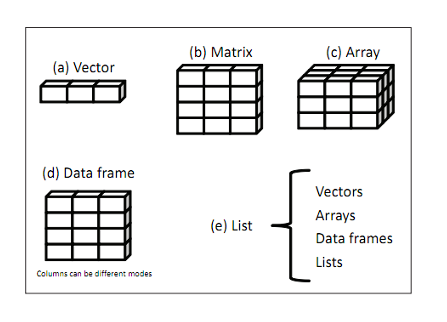

## ■ 기본 데이터 검색

## 문제1. emp 데이터 프레임에서 이름과 월급을 출력하시오!

emp[행,열]  
emp[ , c("ename", "sal")]   

### c는 combine을 뜻함.

In [ ]:
setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

emp[ , c("ename", "sal")]

## 문제2. 월급이 3000인 사원들의 이름과 월급을 출력하시오!

In [ ]:
setwd("d:\\data")
emp <- read.csv("emp.csv", header=T)

emp[emp$sal==3000 , c("ename", "sal")]

In [ ]:
# attach(emp)를 사용할 시

setwd("d:\\data")
emp <- read.csv("emp.csv", header=T)
attach(emp)

emp[sal==3000 , c("ename", "sal")]

## 문제3. 월급이 2000이상인 사원들의 이름과 월급을 출력하시오!

In [ ]:
# attach(emp)를 사용할 시

setwd("d:\\data")
emp <- read.csv("emp.csv", header=T)
attach(emp)

emp[sal >= 2000 , c("ename", "sal")]

## ■ R에서 사용하는 연산자  총 정리

1. 산술 연산자 : * / + -    
2. 비교 연산자 : >, <, >=, <=, ==, !=  
3. 논리연산자   
& : and ( 벡터화된 연산 )  
&& : and ( 벡터화 되지 않은 연산)  
| : or (벡터화된 연산)  
|| : or (벡터화되지 않은 연산)  
! : not  

### ※ 벡터화 되었다는 것은 ?  
X <- c(1,2,3)  
str(X)

### ※ 벡터화 되지 않았다는 것은 ? 
X2 <- 1  
str(X2)

In [ ]:
# R로 실행을 시켰을 때의 결과
> x <- c(1,2,3)
> str(x)
 num [1:3] 1 2 3
> 
> x2 <- 1
> str(x2)
 num 1

## ■ 벡터화 된 연산 vs 벡터화 되지 않은 연산

x <- c(1,2,3)   
x > c(1,1,1) & x < c(3,3,3)   

x2 <- 1  
x2 > -2 && x2 < 2  

## 문제4. 직업이 SALESMAN인 아닌 사원들의 이름과 월급과 직업을 출력하시오!

In [ ]:
# attach(emp)를 사용할 시 ($을 사용하지 않아도 된다.)

setwd("d:\\data")
emp <- read.csv("emp.csv", header=T)
attach(emp)

emp[job != "SALESMAN" , c("ename", "sal", "job")]

## 문제5. 직업이 SALESMAN이고 월급이 1000이상인 사원들의 이름과 월급과 직업을 출력하시오!

In [ ]:
# attach(emp)를 사용할 시

setwd("d:\\data")
emp <- read.csv("emp.csv", header=T)
attach(emp)

emp[job == "SALESMAN" & sal >= 1000 , c("ename", "sal", "job")]

## ■ R shiny 설치

install.packages("shiny") # 설치부분   
library(shiny)   
runExample("01_hello")   

In [ ]:
# 홈페이지 화면만 띄워주는 R shiny 코드
# 이해하면 홈페이지 하나 생성가능!

library(shiny)

# Define UI for app that draws a histogram ----
ui <- fluidPage(

  # App title ----
  titlePanel("Hello Shiny!"),

  # Sidebar layout with input and output definitions ----
  sidebarLayout(

    # Sidebar panel for inputs ----
    sidebarPanel(

      # Input: Slider for the number of bins ----
      sliderInput(inputId = "bins",
                  label = "Number of bins:",
                  min = 1,
                  max = 50,
                  value = 30)

    ),

    # Main panel for displaying outputs ----
    mainPanel(

      # Output: Histogram ----
      plotOutput(outputId = "distPlot")

    )
  )
)

# Define server logic required to draw a histogram ----
server <- function(input, output) {

  # Histogram of the Old Faithful Geyser Data ----
  # with requested number of bins
  # This expression that generates a histogram is wrapped in a call
  # to renderPlot to indicate that:
  #
  # 1. It is "reactive" and therefore should be automatically
  #    re-executed when inputs (input$bins) change
  # 2. Its output type is a plot
  output$distPlot <- renderPlot({

    x    <- faithful$waiting
    bins <- seq(min(x), max(x), length.out = input$bins + 1)

    hist(x, breaks = bins, col = "#75AADB", border = "white",
         xlab = "Waiting time to next eruption (in mins)",
         main = "Histogram of waiting times")

    })

}

# Create Shiny app ----
shinyApp(ui = ui, server = server)

## ■ R shiny 예제

In [ ]:
library(shiny) 



runExample("01_hello") 



runExample("08_html")



runExample("02_text")



runExample("03_reactivity")



runExample("04_mpg")



runExample("05_sliders")



runExample("06_tabsets")



runExample("07_widgets")



runExample("08_html")



runExample("09_upload")



runExample("10_download")



runExample("11_timer")

## ■  홈페이지 구현을 위한 샤이니 ui 의 기능들을 모아놓은 코드

In [ ]:
library(shiny)

# Define UI ----

ui <- fluidPage(

  titlePanel("Basic widgets"),

  

  fluidRow(

    

    column(3,

           h3("Buttons"),

           actionButton("action", "Action"),

           br(),

           br(), 

           submitButton("Submit")),

    

    column(3,

           h3("Single checkbox"),

           checkboxInput("checkbox", "Choice A", value = TRUE)),

    

    column(3, 

           checkboxGroupInput("checkGroup", 

                              h3("Checkbox group"), 

                              choices = list("Choice 1" = 1, 

                                             "Choice 2" = 2, 

                                             "Choice 3" = 3),

                              selected = 1)),

    

    column(3, 

           dateInput("date", 

                     h3("Date input"), 

                     value = "2014-01-01"))   

  ),

  

  fluidRow(

    

    column(3,

           dateRangeInput("dates", h3("Date range"))),

    

    column(3,

           fileInput("file", h3("File input"))),

    

    column(3, 

           h3("Help text"),

           helpText("Note: help text isn't a true widget,", 

                    "but it provides an easy way to add text to",

                    "accompany other widgets.")),

    

    column(3, 

           numericInput("num", 

                        h3("Numeric input"), 

                        value = 1))   

  ),

  

  fluidRow(

    

    column(3,

           radioButtons("radio", h3("Radio buttons"),

                        choices = list("Choice 1" = 1, "Choice 2" = 2,

                                       "Choice 3" = 3),selected = 1)),

    

    column(3,

           selectInput("select", h3("Select box"), 

                       choices = list("Choice 1" = 1, "Choice 2" = 2,

                                      "Choice 3" = 3), selected = 1)),

    

    column(3, 

           sliderInput("slider1", h3("Sliders"),

                       min = 0, max = 100, value = 50),

           sliderInput("slider2", "",

                       min = 0, max = 100, value = c(25, 75))

    ),

    

    column(3, 

           textInput("text", h3("Text input"), 

                     value = "Enter text..."))   

  )

  

)



# Define server logic ----

server <- function(input, output) {

  

}

# Run the app ----

shinyApp(ui = ui, server = server)

## ■ 연결 연산자

### 오라클 : ||
### R : paste

## 문제6. 아래의 SQL을 R로 구현하시오!

In [ ]:
SQL>
select ename || '의 직업은 ' || job  
from emp;

R>

# install.packages("data.table")

library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)
emp

data.table(paste(emp$ename, '의 직업은' , emp$job))

## ■ 기타 비교 연산자

|       SQL      |                 R                 |
|:--------------:|:---------------------------------:|
|       in       |                %in%               |
|      like      |                grep               |
|     is null    |               is.na               |
| between .. and | emp $ sal >= 1000  &  emp $ sal <= 3000 |

## 문제7. 직업이 SALESMAN, ANALYST인 사원들의 이름과 직업을 출력하시오!

In [ ]:
SQL>
select sname, job
from emp
where job in ('SALESMAN', 'ANALYST');

R>
setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

emp[ emp$job %in% c("SALESMAN", "ANALYST"), c("ename","job") ]

## 문제8. 직업이 SALESMAN, ANALYST가 아닌 사원들의 이름과 직업을 출력하시오!

In [ ]:
setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)


emp[ !emp$job %in% c("SALESMAN", "ANALYST"), c("ename","job") ]

## 문제9. 커미션이 null인 사원들의 이름과 월급과 커미션을 출력하시오!

In [ ]:
SQL>
select ename, sal, comm
from emp
where comm is null;

R>
library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

emp[is.na(emp$comm), c("ename", "sal", "comm")]

## ■ R에서의 null 값

1. NULL (아무것도 없다) ----> is.null()
2. NA (결손값) ----> is.na()
3. NAN (비수치) ----> is.nan()

NaN : Not a Number의 약자

### ※ NULL(아무것도 없다)를 활용하는 때는 반복문으로 처리할 오브젝트의 초기값을 NULL로 설정

In [ ]:
# R 버젼
x <- NULL
for(i in 1:10) x <- append(x, i*i)
x

In [5]:
# Python 버젼

x = []
for i in range(1,11):
    x.append(i*i)
    
print(x)

[1, 4, 9, 16, 25, 36, 49, 64, 81, 100]


## 문제10. 커미션이 NA가 아닌 사원들의 이름과 월급과 커미션을 출력하시오!

In [ ]:
R>
library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

emp[!is.na(emp$comm), c("ename", "sal", "comm")]

## ■ 중복제거

SQL : distinct  
R : unique  

## 문제11. 부서번호를 출력하는데 중복제거를해서 출력하시오!

In [ ]:
SQL>
select distinct deptno
from emp

In [ ]:
R>
library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

unique(emp$deptno)

data.table("부서번호" = unique(emp$deptno))

## ■ 정렬 작업

|    SQL   |                       R                       |
|:--------:|:---------------------------------------------:|
| order by |          1. data frame에서 order 옵션         |
|          | 2. doBy 패키지를 설치하고 orderBy 함수를 사용 |

## 문제12. 이름과 월급을 출력하는데 월급이 높은 사원부터 출력하시오!

In [ ]:
SQL>

select ename, sal
from emp
order by sal desc;

R>
library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

# emp[행, 열]
emp[order(emp$sal, decreasing = T), c("ename", "sal")]

## 문제13. 이름과 입사일을 출력하는데 먼저 입사한 사원부터 출력하시오!

In [ ]:
library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

emp[order(emp$hiredate, decreasing = F), c("ename", "hiredate")]

## 문제14. 직업이 SALESMAN인 사원들의 이름과 월급과 직업을 출력하는데 월급이 높은 사원부터 출력하시오!

In [ ]:
library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

x <- emp[emp$job == "SALESMAN", c("ename", "sal", "job")]
x
str(x)

# x[행, 열]

x[order(x$sal, decreasing = T), ] # 열은 다나와야되므로 아무것도 안써도 된다.

## 문제15. (점심시간 문제) 부서번호가 10번, 20번인 사원들의 이름과 월급과 부서번호를 출력하는데 월급이 높은 사원부터 출력하시오!

In [ ]:
library(data.table)

setwd("d:\\data")

emp <- read.csv("emp.csv", header=T)

x <- emp[emp$deptno %in% c("10","20"), c("ename", "sal", "deptno")]


# x[행, 열]

x[order(x$sal, decreasing = T), ] # 열은 다나와야되므로 아무것도 안써도 된다.